In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/trip2016-2017.csv')
df.head()

,start_time,start_station_id
0,1/1/2016 0:12,2707.0
1,1/1/2016 0:12,1007.0
2,1/1/2016 0:12,2563.0
3,1/1/2016 0:12,2707.0
4,1/1/2016 0:18,1007.0


In [ ]:
import numpy as np
print(np.all(np.isinf(df['start_station_id'])))


False


In [ ]:
df['start_station_id'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
307545    False
307546    False
307547    False
307548    False
307549    False
Name: start_station_id, Length: 307550, dtype: bool

In [ ]:
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['start_station_id'].fillna(999, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307550 entries, 0 to 307549
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_time        307550 non-null  object 
 1   start_station_id  307550 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.7+ MB


In [ ]:
df["start_time"] = pd.to_datetime(df["start_time"])

df = df.sort_values(by="start_time")

print(df)

                start_time  start_station_id
0      2016-01-01 00:12:00            2707.0
1      2016-01-01 00:12:00            1007.0
2      2016-01-01 00:12:00            2563.0
3      2016-01-01 00:12:00            2707.0
4      2016-01-01 00:18:00            1007.0
...                    ...               ...
307545 2017-07-31 21:59:00            2566.0
307546 2017-07-31 22:08:00            2565.0
307547 2017-07-31 22:09:00            2498.0
307548 2017-07-31 22:22:00            3621.0
307549 2017-07-31 23:44:00            2495.0

[307550 rows x 2 columns]


In [ ]:
from pandas import to_datetime
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
df.head()

,ds,y
0,2016-01-01 00:12:00,2707.0
1,2016-01-01 00:12:00,1007.0
2,2016-01-01 00:12:00,2563.0
3,2016-01-01 00:12:00,2707.0
4,2016-01-01 00:18:00,1007.0


In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future_dates = model.make_future_dataframe(periods=365)
prediction = model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01 00:12:00,2534.424703,2057.821271,2908.795461,2534.424703,2534.424703,-47.323115,-47.323115,-47.323115,-42.852894,-42.852894,-42.852894,-4.470221,-4.470221,-4.470221,0.0,0.0,0.0,2487.101588
1,2016-01-01 00:18:00,2534.424751,1989.901433,2914.843507,2534.424751,2534.424751,-48.549866,-48.549866,-48.549866,-44.109111,-44.109111,-44.109111,-4.440755,-4.440755,-4.440755,0.0,0.0,0.0,2485.874885
2,2016-01-01 00:27:00,2534.424824,2027.203655,2952.339905,2534.424824,2534.424824,-50.119635,-50.119635,-50.119635,-45.723145,-45.723145,-45.723145,-4.396490,-4.396490,-4.396490,0.0,0.0,0.0,2484.305189
3,2016-01-01 00:43:00,2534.424954,2019.953097,2952.931494,2534.424954,2534.424954,-51.957549,-51.957549,-51.957549,-47.639939,-47.639939,-47.639939,-4.317610,-4.317610,-4.317610,0.0,0.0,0.0,2482.467406
4,2016-01-01 01:09:00,2534.425166,2029.808918,2960.746917,2534.425166,2534.425166,-51.758717,-51.758717,-51.758717,-47.569752,-47.569752,-47.569752,-4.188965,-4.188965,-4.188965,0.0,0.0,0.0,2482.666449


In [43]:
p.to_excel("Task_A_ModelPredictionOutput.xlsx")

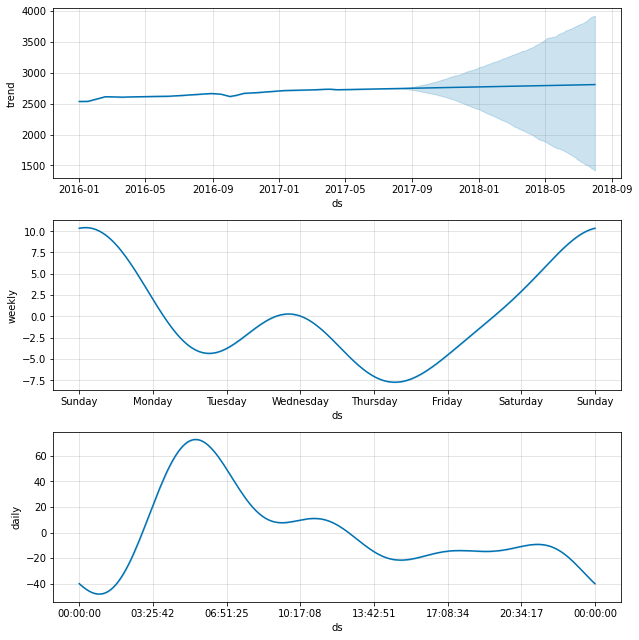

In [ ]:
model.plot_components(prediction);

In [ ]:
!pip install prophet

     |████████████████████████████████| 65 kB 3.3 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 179 kB 24.6 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639879 sha256=7844ef9284e0058cfddb8f985c55392488a99d8720fd71a7472282d193ab395d
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


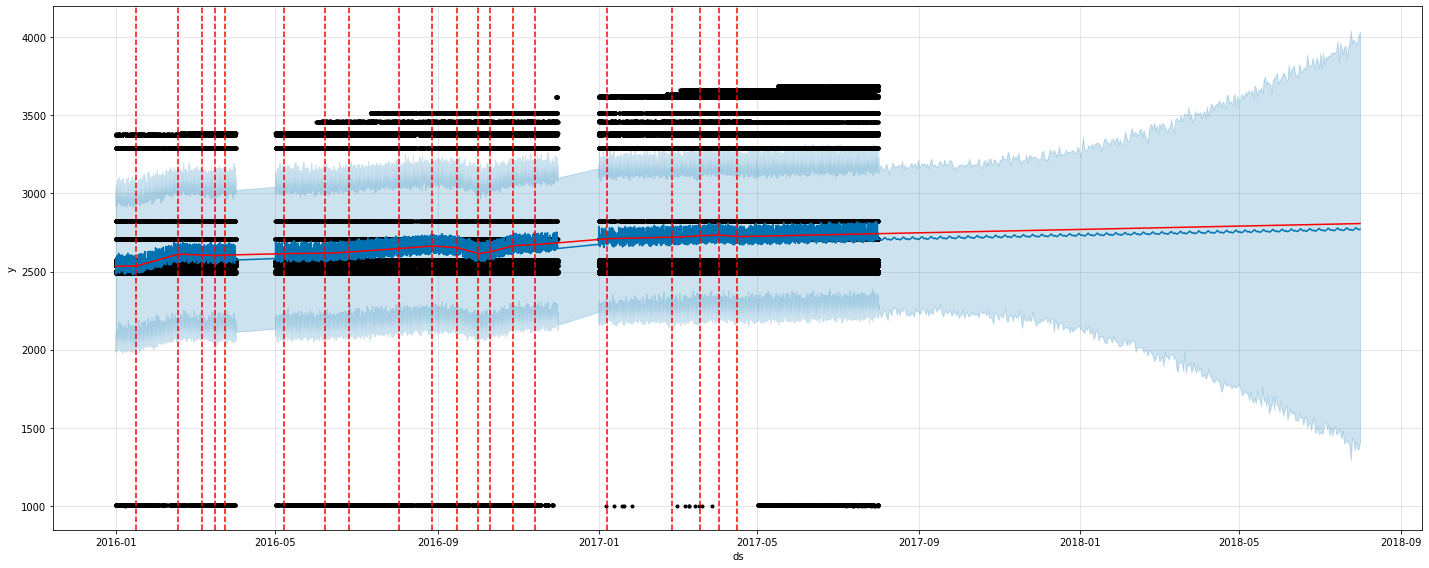

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(prediction,figsize=(20, 8));
a = add_changepoints_to_plot(fig.gca(), model, prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation
cv = cross_validation(model, initial=' 365 days', period = '180 days', horizon = '180 days')
cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2017-02-01 23:44:00 and 2017-02-01 23:44:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-02-02 06:03:00,2797.764837,2328.223144,3216.321838,3390.0,2017-02-01 23:44:00
1,2017-02-02 06:49:00,2783.211146,2340.755119,3197.531819,2542.0,2017-02-01 23:44:00
2,2017-02-02 06:54:00,2781.154924,2344.890038,3220.496586,2498.0,2017-02-01 23:44:00
3,2017-02-02 07:18:00,2770.800699,2291.733157,3210.590197,3291.0,2017-02-01 23:44:00
4,2017-02-02 07:23:00,2768.618234,2362.629260,3210.669428,2566.0,2017-02-01 23:44:00


In [39]:
cv.to_excel("Output.xlsx")

In [40]:
from fbprophet.diagnostics import performance_metrics
p = performance_metrics(cv)
p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
64073,179 days 22:15:00,256686.487968,506.642367,426.480758,0.173238,0.135993,0.854059
64074,179 days 22:24:00,256684.201282,506.640110,426.477073,0.173236,0.135993,0.854059
64075,179 days 22:25:00,256629.957216,506.586574,426.432388,0.173228,0.135993,0.854148
64076,179 days 22:38:00,256676.295852,506.632308,426.477275,0.173238,0.135999,0.854148
64077,180 days 00:00:00,256681.343045,506.637289,426.485893,0.173242,0.136009,0.854148


In [42]:
p.to_excel("Task_A_PredictionOutput.xlsx")